In [1]:
from bs4 import BeautifulSoup
from selenium import webdriver
import time
from selenium.webdriver.common.keys import Keys
import warnings
import requests
import re

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [2]:
#  matplotlib - 한글깨짐 설정이 필요

import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)


In [3]:
df = pd.read_csv('D:/KDT4/Project/project1/daum_oil.csv')
df['company'].unique()

array(['WTI원유선물', '두바이유선물', '브렌트원유선물'], dtype=object)

In [4]:
wtidf = df[df['company'] == 'WTI원유선물']
wtidf.columns = 'WTI_'+ wtidf.columns

In [5]:
wtidf.drop('WTI_company', axis=1, inplace = True)

In [6]:
wtidf.rename({'WTI_date':'date'},axis=1,inplace=True)

In [7]:
brentdf = df[df['company'] == '브렌트원유선물']
brentdf.columns = 'brent_' + brentdf.columns

In [8]:
brentdf.drop('brent_company', axis=1, inplace = True)

In [9]:
brentdf.rename({'brent_date':'date'},axis=1,inplace=True)

In [10]:
dubaidf = df[df['company'] == '두바이유선물']
dubaidf.columns = 'dubai_' + dubaidf.columns
dubaidf.drop('dubai_company',axis=1,inplace=True)

In [11]:
dubaidf.rename({'dubai_date':'date'},axis=1,inplace=True)

In [12]:
dubaidf

,date,dubai_종가,dubai_전일비,dubai_등락률
8072,2022.02.09,89.883,0.601,0.67
8073,2022.02.08,89.282,-1.475,-1.63
8074,2022.02.07,90.757,-0.299,-0.33
8075,2022.02.04,91.056,1.900,2.13
8076,2022.02.03,89.156,1.391,1.58
...,...,...,...,...
12035,2006.01.30,61.430,0.540,0.89
12036,2006.01.27,60.890,0.940,1.57
12037,2006.01.26,59.950,0.630,1.06
12038,2006.01.25,59.320,-1.470,-2.42


In [13]:
mdf = pd.merge(wtidf, brentdf, how='outer',on = 'date')
mdf = pd.merge(mdf, dubaidf, how = 'outer', on = 'date')
mdf

,date,WTI_종가,WTI_전일비,WTI_등락률,brent_종가,brent_전일비,brent_등락률,dubai_종가,dubai_전일비,dubai_등락률
0,2022.02.09,89.66,0.30,0.34,91.55,0.77,0.85,89.883,0.601,0.67
1,2022.02.08,89.36,-1.96,-2.15,90.78,-1.91,-2.06,89.282,-1.475,-1.63
2,2022.02.07,91.32,-0.99,-1.07,92.69,-0.58,-0.62,90.757,-0.299,-0.33
3,2022.02.04,92.31,2.04,2.26,93.27,2.16,2.37,91.056,1.900,2.13
4,2022.02.03,90.27,2.01,2.28,91.11,1.64,1.83,89.156,1.391,1.58
...,...,...,...,...,...,...,...,...,...,...
8274,1990.12.24,NaN,NaN,NaN,26.77,0.99,3.84,NaN,NaN,NaN
8275,1990.11.22,NaN,NaN,NaN,29.99,1.05,3.63,NaN,NaN,NaN
8276,1990.09.03,NaN,NaN,NaN,28.55,1.80,6.73,NaN,NaN,NaN
8277,1990.07.04,NaN,NaN,NaN,15.98,0.01,0.06,NaN,NaN,NaN


In [14]:
mdf = mdf.sort_values('date',ascending=False)
mdf.index = mdf['date']

In [15]:
mdf.drop('date',axis=1,inplace=True)
mdf

,WTI_종가,WTI_전일비,WTI_등락률,brent_종가,brent_전일비,brent_등락률,dubai_종가,dubai_전일비,dubai_등락률
date,,,,,,,,,
2022.02.09,89.66,0.30,0.34,91.55,0.77,0.85,89.883,0.601,0.67
2022.02.08,89.36,-1.96,-2.15,90.78,-1.91,-2.06,89.282,-1.475,-1.63
2022.02.07,91.32,-0.99,-1.07,92.69,-0.58,-0.62,90.757,-0.299,-0.33
2022.02.04,92.31,2.04,2.26,93.27,2.16,2.37,91.056,1.900,2.13
2022.02.03,90.27,2.01,2.28,91.11,1.64,1.83,89.156,1.391,1.58
...,...,...,...,...,...,...,...,...,...
1990.01.08,21.62,-1.46,-6.33,20.52,-1.48,-6.73,NaN,NaN,NaN
1990.01.05,23.08,-0.33,-1.41,22.00,0.49,2.28,NaN,NaN,NaN
1990.01.04,23.41,-0.27,-1.14,21.51,-0.18,-0.83,NaN,NaN,NaN


<Figure size 1080x216 with 0 Axes>

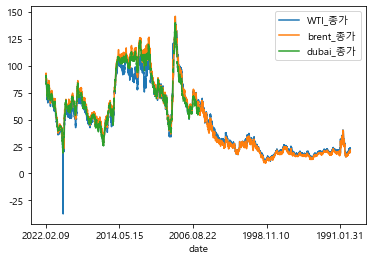

In [16]:
plt.figure(figsize=(15,3))
mdf.filter(like='_종가').plot(kind='line')

In [17]:
mdf.isna().sum()

WTI_종가        207
WTI_전일비       207
WTI_등락률       207
brent_종가       76
brent_전일비      76
brent_등락률      76
dubai_종가     4311
dubai_전일비    4311
dubai_등락률    4311
dtype: int64

In [18]:
mdf

,WTI_종가,WTI_전일비,WTI_등락률,brent_종가,brent_전일비,brent_등락률,dubai_종가,dubai_전일비,dubai_등락률
date,,,,,,,,,
2022.02.09,89.66,0.30,0.34,91.55,0.77,0.85,89.883,0.601,0.67
2022.02.08,89.36,-1.96,-2.15,90.78,-1.91,-2.06,89.282,-1.475,-1.63
2022.02.07,91.32,-0.99,-1.07,92.69,-0.58,-0.62,90.757,-0.299,-0.33
2022.02.04,92.31,2.04,2.26,93.27,2.16,2.37,91.056,1.900,2.13
2022.02.03,90.27,2.01,2.28,91.11,1.64,1.83,89.156,1.391,1.58
...,...,...,...,...,...,...,...,...,...
1990.01.08,21.62,-1.46,-6.33,20.52,-1.48,-6.73,NaN,NaN,NaN
1990.01.05,23.08,-0.33,-1.41,22.00,0.49,2.28,NaN,NaN,NaN
1990.01.04,23.41,-0.27,-1.14,21.51,-0.18,-0.83,NaN,NaN,NaN


In [19]:
mdf.loc['2017.02.10']

WTI_종가       53.86
WTI_전일비       0.86
WTI_등락률       1.62
brent_종가     56.70
brent_전일비     1.07
brent_등락률     1.92
dubai_종가     54.59
dubai_전일비     0.48
dubai_등락률     0.89
Name: 2017.02.10, dtype: float64

In [31]:
import plotly.express as px

In [25]:
plotdf = mdf.loc[:'2017.02.10',['WTI_종가','brent_종가','dubai_종가']]

In [30]:
plotdf = plotdf.sort_index(ascending=True).reset_index()

In [35]:
fig = px.line(plotdf, x = 'date', y = plotdf.columns[1:],hover_data={'date':'|%Y-%m-%d'})
fig.update_xaxes(rangeslider_visible=True)

In [36]:
import plotly.graph_objects as go

In [ ]:
fig = go.Figure(data=[go.Candlestick(x=plotdf['Date'],
                open=plotdf['AAPL.Open'],
                high=plotdf['AAPL.High'],
                low=plotdf['AAPL.Low'],
                close=plotdf['AAPL.Close'])])
fig.show()